**What is the median amount paid each year for all payment methods?**

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
payment_df = pd.read_csv('../data/payment_information.csv')

In [3]:
payment_df

,client_id,payment_date,amount_paid,payment_method
0,6292156167,9/16/2019,447.0,Bank Transfer
1,7462725203,5/21/2018,379.7,Bank Transfer
2,4698004907,9/11/2021,435.1,Check
3,3510240337,12/7/2020,413.1,Check
4,7501599785,3/4/2019,61.1,Bank Transfer
...,...,...,...,...
95,8155233099,6/3/2020,265.9,Credit Card
96,9752784850,9/15/2021,286.8,Credit Card
97,8988409533,5/15/2020,163.2,Credit Card
98,7465144773,9/7/2021,434.6,Check


Adding year as a separate column in the dataframe

In [4]:
payment_df['payment_year'] = payment_df['payment_date'].apply(lambda x: x[-4:])

In [5]:
payment_df

,client_id,payment_date,amount_paid,payment_method,payment_year
0,6292156167,9/16/2019,447.0,Bank Transfer,2019
1,7462725203,5/21/2018,379.7,Bank Transfer,2018
2,4698004907,9/11/2021,435.1,Check,2021
3,3510240337,12/7/2020,413.1,Check,2020
4,7501599785,3/4/2019,61.1,Bank Transfer,2019
...,...,...,...,...,...
95,8155233099,6/3/2020,265.9,Credit Card,2020
96,9752784850,9/15/2021,286.8,Credit Card,2021
97,8988409533,5/15/2020,163.2,Credit Card,2020
98,7465144773,9/7/2021,434.6,Check,2021


In [6]:
result_median_payment_df = payment_df.groupby(['payment_year', 'payment_method']).agg(
    median_amount_paid = ('amount_paid', 'median')
)

In [7]:
result_median_payment_df

median_amount_paid
payment_year payment_method                    
2018         Bank Transfer               281.65
             Check                       216.60
             Credit Card                 229.15
2019         Bank Transfer               184.20
             Check                       410.20
             Credit Card                 401.90
2020         Bank Transfer               225.10
             Check                       413.10
             Credit Card                 285.25
2021         Bank Transfer               255.30
             Check                       435.10
             Credit Card                 208.70
2022         Bank Transfer               196.50
             Check                       275.50
             Credit Card                 326.20

In [8]:
result_median_payment_df.columns

Index(['median_amount_paid'], dtype='object')

In [9]:
result_median_payment_df = result_median_payment_df.reset_index()

In [10]:
result_median_payment_df.to_csv('result_median_payment_per_year_per_payment_method.csv', index = False)

In [11]:
result_median_payment_df = result_median_payment_df.reset_index()

In [13]:
result_median_payment_df

,index,payment_year,payment_method,median_amount_paid
0,0,2018,Bank Transfer,281.65
1,1,2018,Check,216.60
2,2,2018,Credit Card,229.15
3,3,2019,Bank Transfer,184.20
4,4,2019,Check,410.20
5,5,2019,Credit Card,401.90
6,6,2020,Bank Transfer,225.10
7,7,2020,Check,413.10
8,8,2020,Credit Card,285.25
9,9,2021,Bank Transfer,255.30


In [14]:
result_median_payment_df.drop('index', axis = 1, inplace = True)

In [22]:
result_median_payment_df.columns = ['Year', 'Payment Method', 'Median amount paid']

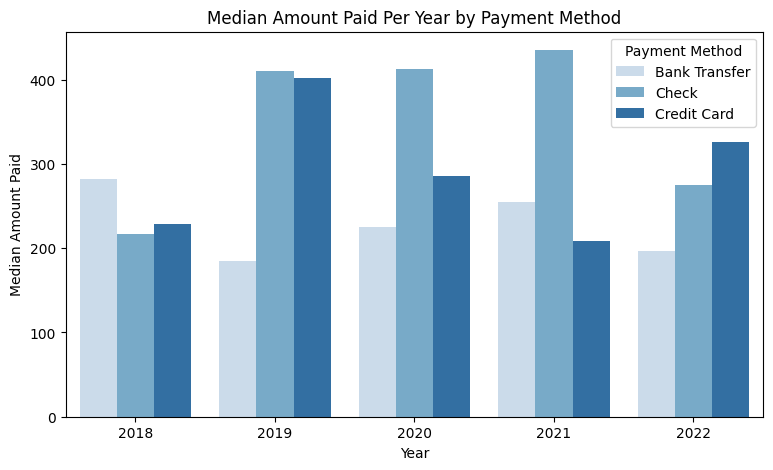

In [24]:
plt.figure(figsize=(9, 5))
sns.barplot(x='Year', y='Median amount paid', hue='Payment Method', data=result_median_payment_df, palette='Blues')
plt.xlabel("Year")
plt.ylabel("Median Amount Paid")
plt.title("Median Amount Paid Per Year by Payment Method")
plt.show()